In [ ]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
X = np.sort(rng.normal(loc=0.6, scale=0.25, size=(50, 1)), axis=0)
print(X)
print(' ')

qt = QuantileTransformer(n_quantiles=10, random_state=0)
print(qt.fit_transform(X)) 

In [15]:
from tqdm import tqdm

In [7]:
names = [x.rstrip().replace('\a', '|') for x in open('/home/gezi/new/temp/feed/rank/portrait/feature_index').readlines()]

In [ ]:
names

In [8]:
feature_file = '/home/gezi/new/temp/feed/rank/online/online/train/rand_0'

In [9]:
def parse(line):
  l = line.split('\t')
  l = l[4:-3]
  return l

In [10]:
lines = open(feature_file).readlines()

In [14]:
lines[:1]

['0\t0\t1f7f869832042146999\topen_doc_prod9406115\t71:1\t356:1\t489241:1\t728427:1\t967760:1\t1207212:1\t1265629:1\t1265643:1\t1265654:1\t1265666:1\t1265687:1\t1265703:1\t1265713:1\t1290152:1\t1329553:1\t1346434:1.0\t1363034:0.808017\t1369893:0.546719\t1374686:0.710506\t1393593:0.515603\t1420057:1\t1420065:1\t1420109:0.996094\t1420124:1\t1420370:1\t1645847:1\t1752105:1\t1861247:1\t1990451:1\t2425736:1\t2426832:1\t2426849:1\t2426971:1\t2427087:1\t2605396:0.1139\t2672003:0.1139\t2709999:0.1139\t2827087:0.1139\t2905288:0.1139\t2907384:1\t2907479:1\t2907638:1\t2907700:1\t2907759:1\n']

In [16]:
durs = []

In [21]:
for i, line in tqdm(enumerate(lines), total=len(lines)):
    l = line.rstrip().split('\t')
    dur = int(l[1])
    if dur > 60 * 60 * 12:
        dur = 60
    durs.append(dur)

100%|██████████| 785877/785877 [00:03<00:00, 209161.85it/s]


In [ ]:
durs[:100]

In [29]:
durs = np.asarray(durs)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

/home/gezi/env/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


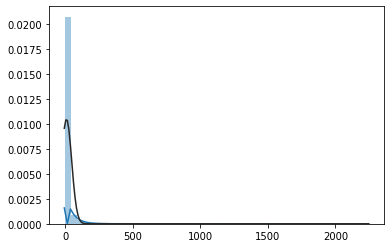

In [30]:
sns.distplot(durs, fit=norm)

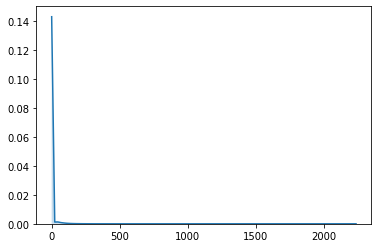

In [31]:
sns.kdeplot(durs, shade=True, cut=0)

In [34]:
sns.distplot(durs, bins=20, kde=True, normed=True)

TypeError: distplot() got an unexpected keyword argument 'normed'

/home/gezi/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([7.43563e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.38390e+04, 1.93670e+04,
        1.89490e+04, 1.69640e+04, 1.14230e+04, 6.11300e+03, 2.58400e+03,
        8.52000e+02, 2.50000e+02, 9.00000e+01, 9.00000e+01, 3.10000e+01]),
 array([0.        , 0.38571156, 0.77142311, 1.15713467, 1.54284623,
        1.92855779, 2.31426934, 2.6999809 , 3.08569246, 3.47140402,
        3.85711557, 4.24282713, 4.62853869, 5.01425024, 5.3999618 ,
        5.78567336, 6.17138492, 6.55709647, 6.94280803, 7.32851959,
        7.71423114]),
 <a list of 20 Patch objects>)

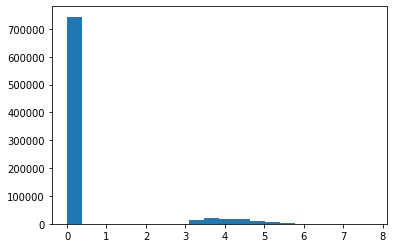

In [211]:
plt.hist([math.log(float(x + 1)) for x in durs], normed=False, bins=20)

In [92]:
math.pow(math.e, 3.5) / 60

0.5519241993115384

/home/gezi/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([7.5470e+03, 1.0415e+04, 1.2033e+04, 1.0920e+04, 1.1240e+04,
        1.0990e+04, 8.7000e+03, 6.9080e+03, 4.9140e+03, 2.9880e+03,
        1.8670e+03, 9.7000e+02, 5.1100e+02, 2.0800e+02, 1.3100e+02,
        5.3000e+01, 5.2000e+01, 5.0000e+01, 5.4000e+01, 1.0000e+00]),
 array([3.09104245, 3.32220189, 3.55336132, 3.78452076, 4.01568019,
        4.24683963, 4.47799906, 4.7091585 , 4.94031793, 5.17147736,
        5.4026368 , 5.63379623, 5.86495567, 6.0961151 , 6.32727454,
        6.55843397, 6.78959341, 7.02075284, 7.25191228, 7.48307171,
        7.71423114]),
 <a list of 20 Patch objects>)

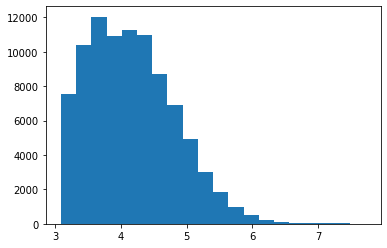

In [209]:
plt.hist([math.log(float(x + 1)) for x in durs if x > 0], normed=False, bins=20)

In [66]:
durs2 = [math.log(float(x + 1)) for x in durs]

In [104]:
np.array(durs2)

array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
       3.8918203])

In [96]:
durs3 = [x for x in durs2 if x < 4 and x >3]

In [97]:
len(durs2)

834115

In [98]:
len(durs3)

39999

In [105]:
 len([x for x in durs2 if x < 8 and x >7])

105

/home/gezi/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([17962., 22953., 22230., 15608.,  7902.,  2837.,   719.,   184.,
          102.,    55.]),
 array([0.38638031, 0.44417017, 0.50196002, 0.55974988, 0.61753974,
        0.6753296 , 0.73311946, 0.79090932, 0.84869918, 0.90648903,
        0.96427889]),
 <a list of 10 Patch objects>)

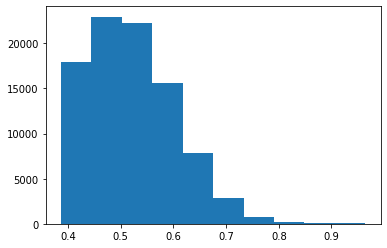

In [210]:
plt.hist([math.log(float(x + 1)) /8 for x in durs if x > 0], normed=False, bins=10)

In [120]:
dur_probs = np.asarray([math.log(float(x + 1)) /8 for x in durs])

/home/gezi/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([7.43563e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.32060e+04,
        3.59130e+04, 1.75360e+04, 3.43600e+03, 3.40000e+02, 1.21000e+02]),
 array([0.        , 0.09642789, 0.19285578, 0.28928367, 0.38571156,
        0.48213945, 0.57856734, 0.67499523, 0.77142311, 0.867851  ,
        0.96427889]),
 <a list of 10 Patch objects>)

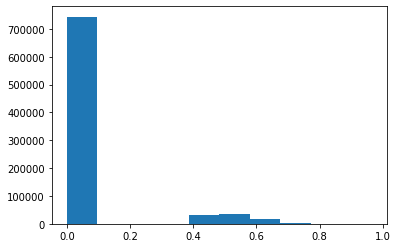

In [121]:
plt.hist(dur_probs, normed=False, bins=10)

In [117]:
dur_probs

array([0.51179307, 0.39725673, 0.55083991, ..., 0.48126845, 0.46110993,
       0.48647754])

In [164]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=1000, random_state=0)
qt = QuantileTransformer(n_quantiles=1000, random_state=0, output_distribution='normal')

In [165]:
durs2 = qt.fit_transform(durs.reshape(-1, 1)).reshape(-1) 

/home/gezi/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([7.43563e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 7.49490e+04, 1.51820e+04, 4.12000e+02, 9.00000e+00]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 10 Patch objects>)

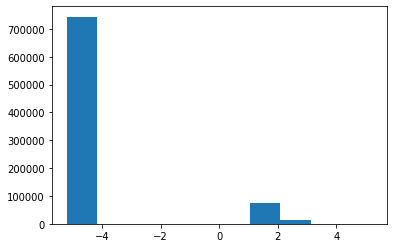

In [169]:
plt.hist(durs2, normed=False, bins=10)

/home/gezi/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([2.7676e+04, 2.0053e+04, 1.4901e+04, 1.0106e+04, 7.3430e+03,
        4.2970e+03, 2.6660e+03, 1.6260e+03, 8.6500e+02, 8.4400e+02,
        9.5000e+01, 3.6000e+01, 2.3000e+01, 6.0000e+00, 6.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00]),
 array([1.23127984, 1.42968273, 1.62808562, 1.8264885 , 2.02489139,
        2.22329428, 2.42169716, 2.62010005, 2.81850294, 3.01690583,
        3.21530871, 3.4137116 , 3.61211449, 3.81051737, 4.00892026,
        4.20732315, 4.40572603, 4.60412892, 4.80253181, 5.0009347 ,
        5.19933758]),
 <a list of 20 Patch objects>)

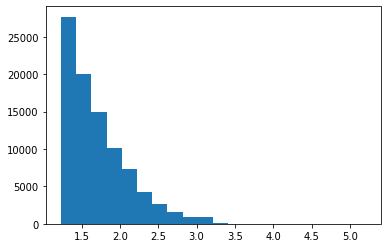

In [276]:
plt.hist([x for x in durs2 if x > 0.001], normed=False, bins=20)

In [172]:
import pickle

In [173]:
qt = QuantileTransformer(n_quantiles=1000, random_state=0, output_distribution='normal')
qt.fit(durs.reshape(-1, 1))

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='normal', random_state=0, subsample=100000)

In [178]:
pickle.dump(qt, open('/home/gezi/new/temp/feed/rank/portrait/qt.normal.pkl', 'wb'))

In [180]:
qt = pickle.load(open('/home/gezi/new/temp/feed/rank/portrait/qt.normal.pkl', 'rb'))

(array([7.43563e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 7.49490e+04, 1.51820e+04, 4.12000e+02, 9.00000e+00]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 10 Patch objects>)

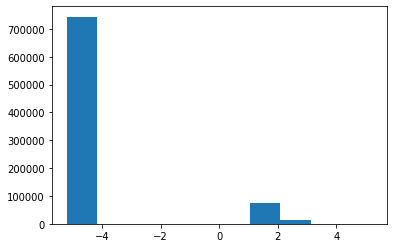

In [181]:
plt.hist(qt.transform(durs.reshape(-1, 1)).reshape(-1))

In [230]:
qt = QuantileTransformer(n_quantiles=1000, random_state=0, output_distribution='normal')
#qt = QuantileTransformer(n_quantiles=1000, random_state=0, output_distribution='uniform')

In [231]:
durs_log = np.asarray([math.log(float(x + 1)) for x in durs if x > 0])

In [232]:
durs_log

array([4.09434456, 3.17805383, 4.40671925, ..., 3.8501476 , 3.68887945,
       3.8918203 ])

In [233]:
qt.fit_transform(durs_log.reshape(-1, 1)).reshape(-1)

array([-0.01129136, -1.82455594,  0.41563423, ..., -0.3561587 ,
       -0.60444843, -0.29136684])

(array([1.318e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.248e+03, 1.199e+03, 2.547e+03,
        3.436e+03, 3.914e+03, 4.459e+03, 5.949e+03, 7.047e+03, 6.821e+03,
        7.352e+03, 7.524e+03, 7.328e+03, 6.289e+03, 5.700e+03, 4.903e+03,
        3.954e+03, 2.968e+03, 2.211e+03, 1.629e+03, 1.062e+03, 6.960e+02,
        4.230e+02, 2.810e+02, 1.230e+02, 9.100e+01, 7.700e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-5.19933758e+00, -4.99136408e+00, -4.78339058e+00, -4.57541707e+00,
        -4.36744357e+00, -4.15947007e+00, -3.95149656e+00, -3.74352306e+00,
        -3.53554956e+00, -3.32757605e+00, -3.11960255e+00, -2.91162905e+00,
        -2.70365554e+00, -2.49568204e+00, -2.28770854e+00, -2.07973503e+00,
        -1.87176153e+00, -1.66378803e+00, -1.45581452e+00, -1.24784102e+

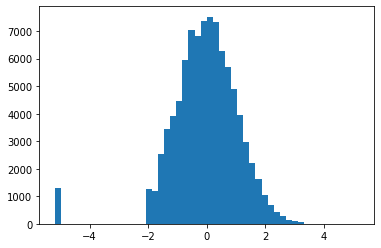

In [234]:
plt.hist(qt.fit_transform(durs_log.reshape(-1, 1)).reshape(-1), bins=50)

(array([743563.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   8807.,  81745.]),
 array([9.99999998e-08, 1.00000080e-01, 2.00000060e-01, 3.00000040e-01,
        4.00000020e-01, 5.00000000e-01, 5.99999980e-01, 6.99999960e-01,
        7.99999940e-01, 8.99999920e-01, 9.99999900e-01]),
 <a list of 10 Patch objects>)

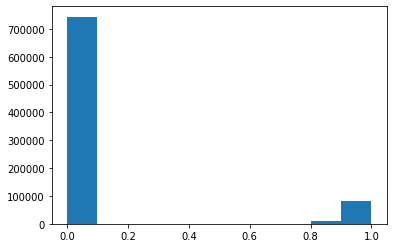

In [186]:
plt.hist(qt.fit_transform(durs_log.reshape(-1, 1)).reshape(-1))

In [236]:
pickle.dump(qt, open('/home/gezi/new/temp/feed/rank/portrait/qt.normal.pkl', 'wb'))

In [238]:
qt = pickle.load(open('/home/gezi/new/temp/feed/rank/portrait/qt.normal.pkl', 'rb'))

In [266]:
(qt.transform([[np.log(22)]]) + 4) / 8

array([[-0.1499172]])

In [262]:
len([x for x in durs if x > 20 and x < 30])

11334

In [261]:
len(durs)

834115

In [264]:
len(durs_log)

90552

In [267]:
qt = QuantileTransformer(n_quantiles=1000, random_state=0, output_distribution='uniform')

In [268]:
qt.fit_transform(durs_log.reshape(-1, 1)).reshape(-1)

array([0.4954955 , 0.03403403, 0.66116116, ..., 0.36086086, 0.27277277,
       0.38538539])

In [269]:
qt.fit_transform(durs_log.reshape(-1, 1)).reshape(-1)

array([0.4954955 , 0.03403403, 0.66116116, ..., 0.36086086, 0.27277277,
       0.38538539])

(array([1318., 2447., 1403., 2379., 1260., 2527., 1226., 1471., 1200.,
        2731., 2548., 1284., 2276., 1293., 1605., 1964., 2185., 1025.,
        2105., 1922., 2008., 1822., 1847., 1757., 1687., 1704., 2238.,
        1471., 2111., 1343., 1923., 1819., 1675., 2136., 1435., 1935.,
        1760., 1905., 1769., 1922., 1759., 1923., 1718., 1923., 1770.,
        1852., 1769., 1802., 1794., 1806.]),
 array([9.99999998e-08, 2.00000960e-02, 4.00000920e-02, 6.00000880e-02,
        8.00000840e-02, 1.00000080e-01, 1.20000076e-01, 1.40000072e-01,
        1.60000068e-01, 1.80000064e-01, 2.00000060e-01, 2.20000056e-01,
        2.40000052e-01, 2.60000048e-01, 2.80000044e-01, 3.00000040e-01,
        3.20000036e-01, 3.40000032e-01, 3.60000028e-01, 3.80000024e-01,
        4.00000020e-01, 4.20000016e-01, 4.40000012e-01, 4.60000008e-01,
        4.80000004e-01, 5.00000000e-01, 5.19999996e-01, 5.39999992e-01,
        5.59999988e-01, 5.79999984e-01, 5.99999980e-01, 6.19999976e-01,
        6.39999972e-01, 

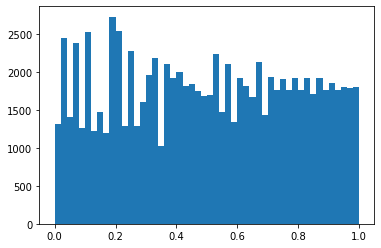

In [270]:
plt.hist(qt.fit_transform(durs_log.reshape(-1, 1)).reshape(-1), bins=50)

In [271]:
pickle.dump(qt, open('/home/gezi/new/temp/feed/rank/portrait/qt.uniform.pkl', 'wb'))

In [272]:
qt = pickle.load(open('/home/gezi/new/temp/feed/rank/portrait/qt.uniform.pkl', 'rb'))

In [275]:
qt.transform([[np.log(120)]])

array([[0.82382382]])